In [1]:
from Classifier import knn as knn
from Training import Datacreate as dc
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
LeftEye_path = "./Recordings/Fall_2020/OpenBCISession_2020-10-11_16-33-50-YAN-LEFT-EYE/OpenBCI-RAW-2020-10-11_16-38-59.txt"
LeftEye_label_path = "./Recordings/Labels/yanLeftEye"
LeftEye_observations = dc.getObservations(LeftEye_path, LeftEye_label_path, 1000, [0,1,2], 'L_EYE')

y_channels_groups, ind_groups, t_groups, l_groups = LeftEye_observations

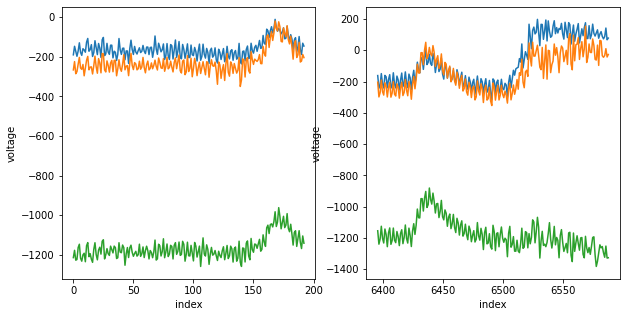

In [11]:
na_ind = 0 #non-action
a_ind = 32 #action

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlabel('index')
plt.ylabel('voltage')
for channel_groups in y_channels_groups:
    plt.plot(ind_groups[na_ind], channel_groups[na_ind])


plt.subplot(1,2,2)
plt.xlabel('index')
plt.ylabel('voltage')
for channel_groups in y_channels_groups:
    plt.plot(ind_groups[a_ind], channel_groups[a_ind])

In [1]:
# Pseudocode:

"""

    -- import the neccasary components -- 

    import Classifier as Classifier
    import RC_Controller as RC_Controller
    import RealTime_Capture as EEG

    model = Classifier.load(model="KNN")

    #if the below code takes longer than 500ms to run, 
    # either increase interval 
    # or make each iteration run in the background so it doesnt delay the next
    every 2 seconds: 
        # read stream should always return the same number of data points
        input = eeg.read_stream("1 second")
        outputLabel = model.classify(input)
        RC_Controller.sendSignal(outputLabel)


"""
from Classifier import GBDecisionTree as gbdt
import numpy as np
from RealTime_Capture import Capture as capt
from RC_Controller import Controller as contr
from Training import Preprocess as processing

import time

#setup capture module
serialPort = "COM3"
EEG = capt.Capture(1, serialPort)

# init base
kc = gbdt.GBDecisionTree()
ac = gbdt.GBDecisionTree()

kc.loadModel("C:\\Users\\Sam\\workspace\\R-Cario\\Classifier\\Saved_Models\\prod_action_XGB_NAFeature.joblib")
ac.loadModel("C:\\Users\\Sam\\workspace\\R-Cario\\Classifier\\Saved_Models\\prod_non_selector_XGB_NAFeature.joblib")

#init controller
controller = contr.Controller(9600, 'COM6')
controller.connect()

means = np.array([[1105.78098721,  251.60192246, 1193.51012919,  890.36304615], [93862.20476045,  7523.20183377, 10938.9161295 , 72701.30213732], [77.96145519, 36.8555236 , 43.23477836, 71.08503054], [288.06211688, 137.16852437, 161.36465859, 252.03221684], [ 986.80093244,  199.43441507, 1133.65463523,  785.98859685], [1228.4993809 ,  309.98865681, 1263.11065848,  999.94915174]])
stdevs = np.array([[701.29549086, 239.65263425, 405.58976194, 537.98950971], [715355.86582232,  30093.86588465,  39312.62294731, 754404.82304548], [249.85177453,  61.95052414,  74.49602556, 227.85183245], [876.03955793, 205.47179985, 254.5675518 , 707.79059043], [734.51799699, 228.73940395, 390.71919533, 597.50667836], [897.69540362, 283.07204045, 450.41051538, 695.1011759 ]])
print("ATTEMPT START STREAM")
EEG.startStream()
for i in range(20): # change this loop condition to while flag 
    NUM_SAMPLES = 190
    data = EEG.getData(2, NUM_SAMPLES)
    print("Data:\n", data)
    processed_data = processing.preprocess(data.reshape(4, 1,-1), means, stdevs)
    action = np.multiply((1-ac.predict(processed_data)), kc.predict(processed_data))
    print(action)
    controller.sendAction(action)

controller.close()

EEG.closeStream()

BrainFlowError: GENERAL_ERROR:17 unable to prepare streaming session

In [6]:
data.reshape(1,4, -1).shape

(1, 4, 414)